In [1]:
''' This project is to predict whether a Candidate will attend the interview or not.'''

' This project is to predict whether a Candidate will attend the interview or not.'

# About Data


The Dataset consists of details of 1200 + candidates and the interviews they have attended during the course of the period 2014-2016.

Source: https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem

### Attribute Information:

Date of Interview
This date refers to the day the candidates were scheduled for the interview. The formats vary.

Client name
The clients that gave the recruitment vendor the requisite mandate

Industry
This refers to the vertical the client belongs(Note Candidates can jump across verticals in their job hunt)

Location
Refers to the current location of the candidate

Position to be closed
Niche refers to rare skill sets while routine refers to more common skill sets

Nature of Skillset
This refers to the skill the client has and specifies the same

Interview Type
There are three types of interview- Walkin drives- these are unscheduled. Candidates are either contacted or they come to the interview on their own volition, Scheduled- Here the candidates profiles are screened by the client and subsequent to this, the vendor fixes an appointment between the client and the candidate. The third one is a scheduled walkin. Here the number of candidates is larger and the candidates are informed beforehand of a tentative date to ascertain their availability. The profiles are screened as in a scheduled interview. In a sense it bears features of both a walk-in and a scheduled interview

Name(Cand ID)
This is a substitute to keep the candidates identity a secret

Gender
Whether the candidate is male or female

Candidate Current Location

Candidate Job Location

Interview Venue

Candidate Native location

Have you obtained the necessary permission to start at the required time

Hope there will be no unscheduled meetings

Can I Call you three hours before the interview and follow up on your attendance for the interview

Can I have an alternative number/ desk number. I assure you that I will not trouble you too much

Have you taken a printout of your updated resume. Have you read the JD and understood the same

Are you clear with the venue details and the landmark.

Has the call letter been shared

Expected Attendance

Whether the candidate was expected to attend the interview. Here the it is either yes no or uncertain

Observed Attendance
Whether the candidate attended the interview. This is binary and will form our dependent variable

Marital Status
Whether the candidate is married or Single

# Import Libraries


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-interview-attendance-problem/Interview.csv
/kaggle/input/the-interview-attendance-problem/Interview.xlsx


# Import data

In [3]:
df = pd.read_csv('/kaggle/input/the-interview-attendance-problem/Interview.csv')

# Profile data

In [4]:
### Run this to Profile data

import pandas_profiling as pp
profile = pp.ProfileReport(    df, title="Campus Recruitment Profile", html={"style": {"full_width": True}}, sort=None)
profile

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations:

last 5 colums are blank

last 1 row is blank

Contains null values in 8 columns

contains missplled data in multiple columns

# Preprocessing

In [5]:
print(df.isnull().sum())

Date of Interview                                                                                        1
Client name                                                                                              0
Industry                                                                                                 1
Location                                                                                                 1
Position to be closed                                                                                    1
Nature of Skillset                                                                                       1
Interview Type                                                                                           1
Name(Cand ID)                                                                                            1
Gender                                                                                                   1
Candidate Current Location           

In [6]:
# Drop last row as it has all NaN
#df = df[:-1] 
df = df.drop(df.tail(1).index)
# drop irrelevant columns 
df.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Name(Cand ID)'], 
                  axis=1, inplace=True)
print("Dataset Shape : ", df.shape)

Dataset Shape :  (1233, 22)


In [7]:
# change column name to shorter names
df=df.rename(columns={'Date of Interview':'weekday',
                          'Client name':'client',
                          'Gender':'gender',
                          'Industry':'industry',
                          'Location':'location',
                          'Position to be closed':'job_skills_required',
                          'Nature of Skillset':'candidate_skills',
                          'Interview Type':'interview_type',
                          'Candidate Current Location':'candidate_loc',
                          'Candidate Job Location':'job_location',
                          'Interview Venue':'venue',
                          'Candidate Native location':'native_loc',
                          'Have you obtained the necessary permission to start at the required time':'permission',
                          'Hope there will be no unscheduled meetings':'hope',
                          'Can I Call you three hours before the interview and follow up on your attendance for the interview':'3_hour_call',
                          'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much':'alt_number',
                          'Have you taken a printout of your updated resume. Have you read the JD and understood the same':'resume_printout',
                          'Has the call letter been shared':'share_letter',
                          'Are you clear with the venue details and the landmark.':'knows_location',
                          'Expected Attendance':'expected_attendance',
                          'Observed Attendance':'observed_attendance'
                         })
print(df.columns)

Index(['weekday', 'client', 'industry', 'location', 'job_skills_required',
       'candidate_skills', 'interview_type', 'gender', 'candidate_loc',
       'job_location', 'venue', 'native_loc', 'permission', 'hope',
       '3_hour_call', 'alt_number', 'resume_printout', 'knows_location',
       'share_letter', 'expected_attendance', 'observed_attendance',
       'Marital Status'],
      dtype='object')


In [8]:
print(df.isnull().sum())

weekday                  0
client                   0
industry                 0
location                 0
job_skills_required      0
candidate_skills         0
interview_type           0
gender                   0
candidate_loc            0
job_location             0
venue                    0
native_loc               0
permission             204
hope                   247
3_hour_call            247
alt_number             247
resume_printout        248
knows_location         248
share_letter           245
expected_attendance      5
observed_attendance      0
Marital Status           0
dtype: int64


<AxesSubplot:xlabel='hope', ylabel='count'>

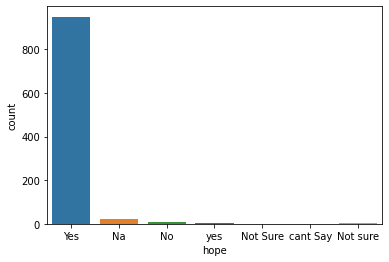

In [9]:
sns.countplot(df['hope'])

<AxesSubplot:xlabel='expected_attendance', ylabel='count'>

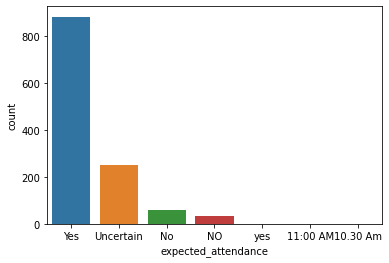

In [10]:
sns.countplot(df['expected_attendance'])

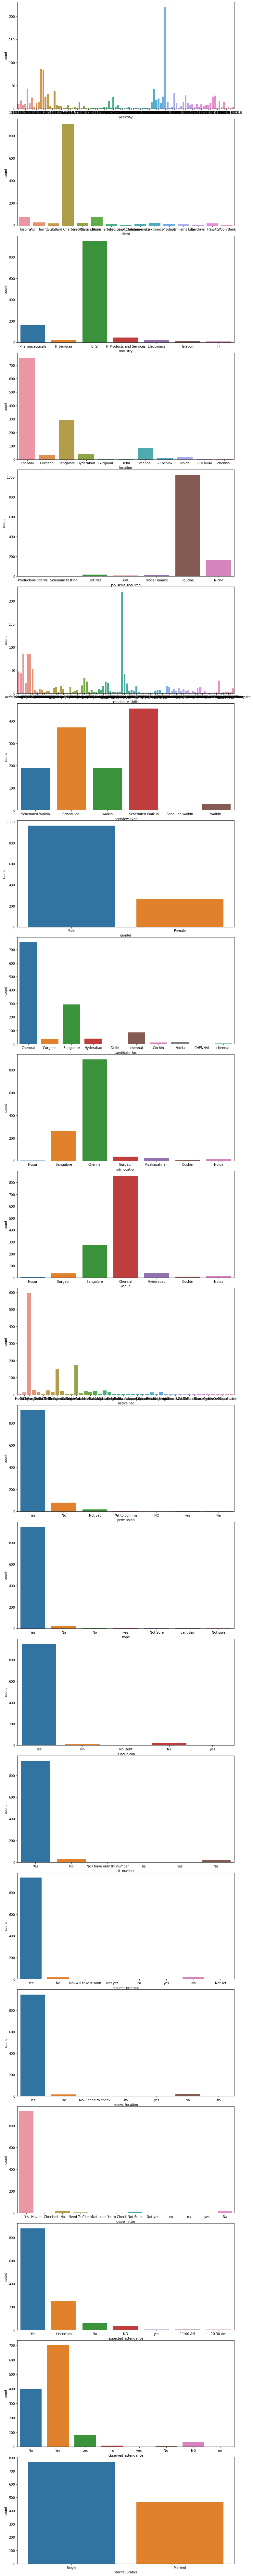

In [11]:
#lets automate the plots
fig,axes = plt.subplots(len(df.columns),figsize=(10,5*len(df.columns)))
plt.tight_layout()
for idx,col in enumerate(df.columns):
    sns.countplot(df[col],ax=axes[idx])

In [12]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [13]:
df.job_skills_required.unique()

array(['Production- Sterile', 'Selenium testing', 'Dot Net', 'AML',
       'Trade Finance', 'Routine', 'Niche'], dtype=object)

In [14]:
# group them into skilled and routine(production-Sterile and Routine)
def rename_job_skill(data):
    if data == 'Routine' or data == 'Production- Sterile':
        return 'routine'
    else:
        return 'skilled'
    
df.job_skills_required = df.job_skills_required.apply(rename_job_skill)

In [15]:
print("Total count",df.job_skills_required.count())
print("Unique categories:\n",df.job_skills_required.value_counts())

Total count 1233
Unique categories:
 routine    1028
skilled     205
Name: job_skills_required, dtype: int64


In [16]:
df.candidate_skills.unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'CDD KYC', 'Biosimiliars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Biosimilars', 'Regulatory',
       'Analytical R & D', 'Analytical R&D',
       'Senior software engineer-Mednet', 'Tech lead-Mednet',
       'Tech Lead- Mednet', 'Technical Lead', 'Sr Automation Testing',
       'TL', 'Senior Analyst', 'production', 'Production', 'Core Java',
       'Java J2EE', 'Oracle Plsql', 'Java,SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'JAVA/J2EE/Struts/Hibernate',
       'JAVA/SPRING/HIBERNATE/JSF', 'Java', 'Java JSF', 'Java,J2ee, JSF',
       'Java ,J2ee', 'Java J

Data has so much variations and is hard to categorize, we will exclude it for now

In [17]:
df.share_letter.unique()

array(['Yes', nan, 'Havent Checked', 'No', 'Need To Check', 'Not sure',
       'Yet to Check', 'Not Sure', 'Not yet', 'no', 'na', 'yes', 'Na'],
      dtype=object)

Data has variations and doesn't  seem relevant, drop it for now

In [18]:
df.drop(['candidate_skills','share_letter'], 
                  axis=1, inplace=True)
print("Dataset Length : ", len(df))
print("Dataset Shape : ", df.shape)
print("list of columns",df.columns)

Dataset Length :  1233
Dataset Shape :  (1233, 20)
list of columns Index(['weekday', 'client', 'industry', 'location', 'job_skills_required',
       'interview_type', 'gender', 'candidate_loc', 'job_location', 'venue',
       'native_loc', 'permission', 'hope', '3_hour_call', 'alt_number',
       'resume_printout', 'knows_location', 'expected_attendance',
       'observed_attendance', 'Marital Status'],
      dtype='object')


In [19]:
df.interview_type.unique()

array(['Scheduled Walkin', 'Scheduled ', 'Walkin', 'Scheduled Walk In',
       'Sceduled walkin', 'Walkin '], dtype=object)

In [20]:
#We will re-classify them into walkin, scheduled and scheduled_walkin
def rename_interview_type(data):
    interview_type=data.rstrip().lower()
    if interview_type=='walkin':
        return 'walkin'
    elif interview_type =='scheduled':
        return 'scheduled'
    else:
        return 'scheduled_walkin'
df.interview_type=df.interview_type.apply(rename_interview_type)

In [21]:
print("Total count",df.interview_type.count())
print("Unique categories:\n",df.interview_type.value_counts())

Total count 1233
Unique categories:
 scheduled_walkin    646
scheduled           371
walkin              216
Name: interview_type, dtype: int64


In [22]:
# Industry
df.industry.unique()

array(['Pharmaceuticals', 'IT Services', 'BFSI',
       'IT Products and Services', 'Electronics', 'Telecom', 'IT'],
      dtype=object)

In [23]:
# Group IT in one category
def rename_industry(data):
    if 'IT' in data:
        return 'IT'
    else:
        return data
df.industry=df.industry.apply(rename_industry)

In [24]:
print("Total count",df.industry.count())
print("Unique categories:\n",df.industry.value_counts())

Total count 1233
Unique categories:
 BFSI               949
Pharmaceuticals    165
IT                  79
Electronics         23
Telecom             17
Name: industry, dtype: int64


 Lets review the knows_location data which corresponds to na , NA and nan 

In [25]:
df[(pd.isnull(df.knows_location)) | (df.knows_location == 'na') | (df.knows_location == 'Na')]

,weekday,client,industry,location,job_skills_required,interview_type,gender,candidate_loc,job_location,venue,native_loc,permission,hope,3_hour_call,alt_number,resume_printout,knows_location,expected_attendance,observed_attendance,Marital Status
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,routine,scheduled_walkin,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,Uncertain,No,Single
123,25.05.2016,Standard Chartered Bank,BFSI,Chennai,routine,scheduled_walkin,Female,Chennai,Chennai,Chennai,Chennai,No,Yes,No,No,NaN,NaN,Uncertain,Yes,Single
242,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,routine,scheduled_walkin,Male,Bangalore,Bangalore,Bangalore,Chennai,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
243,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,routine,scheduled_walkin,Female,Bangalore,Bangalore,Bangalore,Bangalore,No,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
244,13.04.2016,Standard Chartered Bank,BFSI,Bangalore,routine,scheduled_walkin,Male,Bangalore,Bangalore,Bangalore,Chennai,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,06.02.2016,Standard Chartered Bank,BFSI,Chennai,routine,scheduled_walkin,Male,Chennai,Chennai,Chennai,Hyderabad,No,NaN,NaN,NaN,NaN,NaN,Uncertain,yes,Single
1086,06.02.2016,Standard Chartered Bank,BFSI,Chennai,routine,scheduled_walkin,Female,Chennai,Chennai,Chennai,Cuttack,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
1087,06.02.2016,Standard Chartered Bank,BFSI,Chennai,routine,scheduled_walkin,Male,Chennai,Chennai,Chennai,Chennai,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
1088,06.02.2016,Standard Chartered Bank,BFSI,Chennai,routine,scheduled_walkin,Male,Chennai,Chennai,Chennai,Hyderabad,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single


We notice that there is large overlap between the nan in known_location and expected_attendance

In [26]:
def rename_know_location(data):
    if pd.isnull(data) or data =='na' or data =='Na':
        return np.nan
    knows=data.rstrip().lower()
    if knows=='yes':
        return 'yes'
    else:
        return 'no'
df.knows_location=df.knows_location.apply(rename_know_location)

In [27]:
print("Total count",df.knows_location.count())
print("Unique categories:\n",df.knows_location.value_counts())

Total count 965
Unique categories:
 yes    948
no      17
Name: knows_location, dtype: int64


In [28]:
#Let's replace missing values with the mode
most_freq_loc=df.knows_location.mode().iloc[0]
# set missing value with the mode
df.knows_location=df.knows_location.apply(lambda x:most_freq_loc if pd.isnull(x) else x)

In [29]:
print("Total count",df.knows_location.count())
print("Unique categories:\n",df.knows_location.value_counts())

Total count 1233
Unique categories:
 yes    1216
no       17
Name: knows_location, dtype: int64


In [30]:
print("Unique Expected Attendance",df.expected_attendance.unique())
print("Unique Observed Attendance", df.observed_attendance.unique())

Unique Expected Attendance ['Yes' 'Uncertain' 'No' 'NO' 'yes' nan '11:00 AM' '10.30 Am']
Unique Observed Attendance ['No' 'Yes' 'yes' 'no' 'yes ' 'No ' 'NO' 'no ']


In [31]:
def rename_expected_attendance(data):
    if pd.isnull(data):
        return np.nan
    attendance=data.rstrip().lower()
    if attendance =='no' or attendance == 'uncertain':
        return attendance
    else:
        return 'yes'
    
df.expected_attendance=df.expected_attendance.apply(rename_expected_attendance)

In [32]:
print("Total count",df.expected_attendance.count())
print("Unique categories:\n",df.expected_attendance.value_counts())

Total count 1228
Unique categories:
 yes          885
uncertain    250
no            93
Name: expected_attendance, dtype: int64


In [33]:
#expected_attendance is missing some value , let's replace them with mode
most_freq_loc=df.expected_attendance.mode().iloc[0]
# set missing value with the mode
df.expected_attendance=df.expected_attendance.apply(lambda x:   most_freq_loc if pd.isnull(x) else x)

print("Total count",df.expected_attendance.count())
print("Unique categories:\n",df.expected_attendance.value_counts())

Total count 1233
Unique categories:
 yes          890
uncertain    250
no            93
Name: expected_attendance, dtype: int64


In [34]:
# We should not care if candidate is not expected to come so lets drop those rows
df=df[df.expected_attendance !='no']
print("Dataset Length : ", len(df))
print("Dataset Shape : ", df.shape)


Dataset Length :  1140
Dataset Shape :  (1140, 20)


In [35]:
def rename_hope(data):
    if pd.isnull(data):
        return np.nan
    value=data.rstrip().lower()
    if value == 'unsure' or value == 'not sure' or value == 'cant say' or value == 'nan' or value == 'na':
        return 'no'
    else:
        return 'yes'
df.hope = df.hope.fillna('unsure')
df.hope=df.hope.apply(rename_hope)

print("Total count",df.hope.count())
print("Unique categories:\n",df.hope.value_counts())

Total count 1140
Unique categories:
 yes    924
no     216
Name: hope, dtype: int64


In [36]:
def rename_permission(data):
    if pd.isnull(data):
        return np.nan
    value=data.rstrip().lower()
    if value == 'not yet' or value == 'na' or value =='no':
        return 'no'
    elif value == 'yet to confirm' or value == 'yes':
        return 'yes'
    else:
        return data
    
df.permission = df.permission.fillna('no')
df.permission=df.permission.apply(rename_permission)

print("Total count",df.permission.count())
print("Unique categories:\n",df.permission.value_counts())

Total count 1140
Unique categories:
 yes    914
no     226
Name: permission, dtype: int64


In [37]:
def rename_observed_attendance(data):
    if pd.isnull(data):
        return np.nan
    attendance=data.rstrip().lower()
    if attendance =='no':
        return attendance
    else:
        return 'yes'
    
df.observed_attendance=df.observed_attendance.apply(rename_observed_attendance)

print("Total count",df.observed_attendance.count())
print("Unique categories:\n",df.observed_attendance.value_counts())

Total count 1140
Unique categories:
 yes    782
no     358
Name: observed_attendance, dtype: int64


## Convert date into weekdays

In [38]:
from datetime import datetime

#function to check if a character is between a-z or 1-9
def is_myalnum(char):
    return (ord(char.lower()) in range(ord('a'), ord('z')+1)
            or char.isdigit())

#extracts the day, month and year from the data
def parse_string(date_str):

    date = [] #contain [day, month, year]
    val = ""
    
    counter = 0
    str_len = len(date_str)
    
    while (len(date) < 3):
        char = date_str[counter]
        #print(counter, str_len, char, is_myalnum(char))
        
        if is_myalnum(char):
            val += char
        
        elif not is_myalnum(char) and not val == "":
            date.append(val)
            val = ""

        if counter == (str_len - 1) and not val == "":
            date.append(val)
            val = ""
        
        counter += 1
    return date
    
#converts the date into a weekday
def convert_date(data):

    [day, month, year]= parse_string(data)

    year = int(year)
    day = int(day)
    if month.isdigit(): 
        date = datetime(year, int(month), day)
                        
    else:
        month = int(datetime.strptime(month, "%b").strftime("%m"))
        date = datetime(year, month, day)

    return date.strftime('%A')
        
df.weekday = df.weekday.apply(convert_date)
print("Total count",df['weekday'].count())
print("Unique categories:\n",df['weekday'].value_counts())

Total count 1140
Unique categories:
 Saturday     406
Wednesday    183
Friday       180
Thursday     143
Sunday       108
Tuesday       87
Monday        33
Name: weekday, dtype: int64


In [39]:
df['3_hour_call'] = df['3_hour_call'].fillna('no')
for i,v in enumerate(df['3_hour_call']):
    value = v.lower()
    if value == 'no dont' or value == 'na':
        df['3_hour_call'].iloc[i] = 'no'
    else:
         df['3_hour_call'].iloc[i] = value

print("Total count",df['3_hour_call'].count())
print("Unique categories:\n",df['3_hour_call'].value_counts())

Total count 1140
Unique categories:
 yes    915
no     225
Name: 3_hour_call, dtype: int64


In [40]:
def rename_altnum(data):
    if pd.isnull(data):
        return np.nan
    value=data.rstrip().lower()
    if value == 'no i have only this number' or value == 'na':
        return 'no'
    else:
        return 'yes'
df.alt_number = df.alt_number.fillna('no')
df.alt_number=df.alt_number.apply(rename_altnum)

print("Total count",df.alt_number.count())
print("Unique categories:\n",df.alt_number.value_counts())

Total count 1140
Unique categories:
 yes    1135
no        5
Name: alt_number, dtype: int64


In [41]:
def rename_print(data):
    if pd.isnull(data):
        return np.nan
    value=data.rstrip().lower()
    if value == 'no- will take it soon' or value == 'not yet' or value == 'na' or value=='no':
        return 'no'
    elif value == 'yes':
        return 'yes'

df.resume_printout = df.resume_printout.fillna('NA')
df.resume_printout=df.resume_printout.apply(rename_print)

print("Total count",df.resume_printout.count())
print("Unique categories:\n",df.resume_printout.value_counts())

Total count 1140
Unique categories:
 yes    916
no     224
Name: resume_printout, dtype: int64


In [42]:
print(df.columns)
for col in df.columns:
    print("Unique ",col,"\n",df[col].unique())

Index(['weekday', 'client', 'industry', 'location', 'job_skills_required',
       'interview_type', 'gender', 'candidate_loc', 'job_location', 'venue',
       'native_loc', 'permission', 'hope', '3_hour_call', 'alt_number',
       'resume_printout', 'knows_location', 'expected_attendance',
       'observed_attendance', 'Marital Status'],
      dtype='object')
Unique  weekday 
 ['Friday' 'Tuesday' 'Monday' 'Thursday' 'Wednesday' 'Sunday' 'Saturday']
Unique  client 
 ['Hospira' 'Aon Hewitt' 'UST' 'Standard Chartered Bank' 'ANZ' 'Pfizer'
 'Standard Chartered Bank Chennai' 'Aon hewitt Gurgaon' 'Astrazeneca'
 'Flextronics' 'Prodapt' 'Williams Lea' 'Barclays' 'Hewitt' 'Woori Bank']
Unique  industry 
 ['Pharmaceuticals' 'IT' 'BFSI' 'Electronics' 'Telecom']
Unique  location 
 ['Chennai' 'Gurgaon' 'Bangalore' 'Hyderabad' 'Gurgaonr' 'Delhi' 'chennai'
 '- Cochin- ' 'Noida' 'CHENNAI' 'chennai ']
Unique  job_skills_required 
 ['routine' 'skilled']
Unique  interview_type 
 ['scheduled_walkin' 'sched

In [43]:
df.describe()

,weekday,client,industry,location,job_skills_required,interview_type,gender,candidate_loc,job_location,venue,native_loc,permission,hope,3_hour_call,alt_number,resume_printout,knows_location,expected_attendance,observed_attendance,Marital Status
count,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
unique,7,15,5,11,2,3,2,10,7,7,45,2,2,2,2,2,2,2,2,2
top,Saturday,Standard Chartered Bank,BFSI,Chennai,routine,scheduled_walkin,Male,Chennai,Chennai,Chennai,Chennai,yes,yes,yes,yes,yes,yes,yes,yes,Single
freq,406,857,902,683,966,613,898,683,816,779,544,914,924,915,1135,916,1136,890,782,718


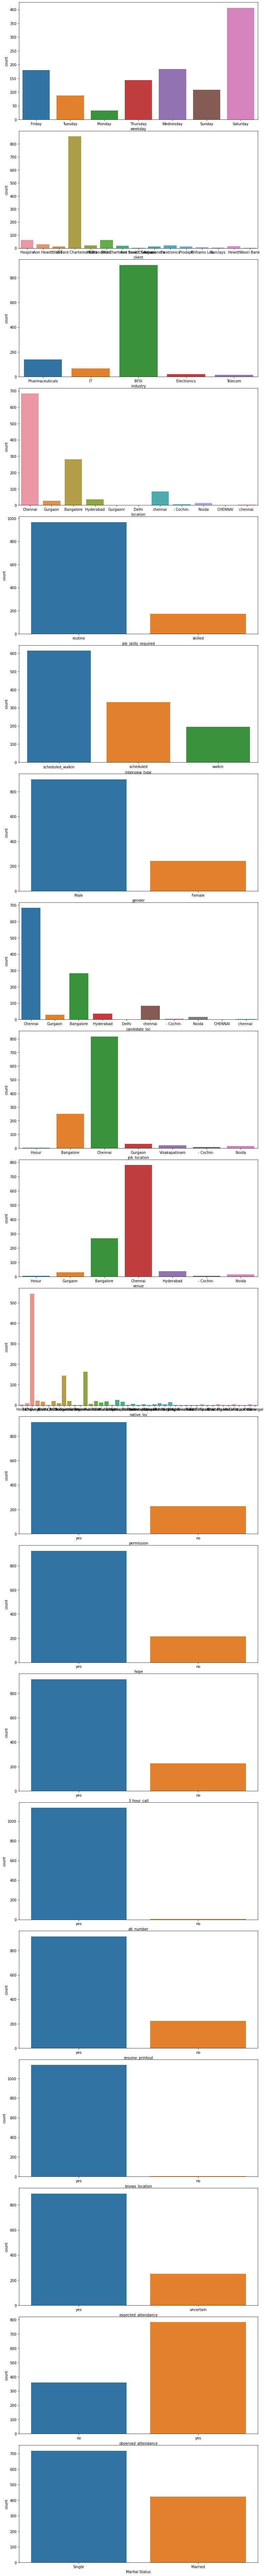

In [44]:
#lets plot the clean data(subset)
fig,axes = plt.subplots(len(df.columns),figsize=(10,5*len(df.columns)))
plt.tight_layout()
for idx,col in enumerate(df.columns):
    sns.countplot(df[col],ax=axes[idx])

In [45]:
# Lets drop native location and 'Marital Status' columns as well
df.drop(['native_loc','Marital Status'], 
                  axis=1, inplace=True)

In [46]:
df.head()

,weekday,client,industry,location,job_skills_required,interview_type,gender,candidate_loc,job_location,venue,permission,hope,3_hour_call,alt_number,resume_printout,knows_location,expected_attendance,observed_attendance
0,Friday,Hospira,Pharmaceuticals,Chennai,routine,scheduled_walkin,Male,Chennai,Hosur,Hosur,yes,yes,yes,yes,yes,yes,yes,no
1,Friday,Hospira,Pharmaceuticals,Chennai,routine,scheduled_walkin,Male,Chennai,Bangalore,Hosur,yes,yes,yes,yes,yes,yes,yes,no
2,Friday,Hospira,Pharmaceuticals,Chennai,routine,scheduled_walkin,Male,Chennai,Chennai,Hosur,no,no,no,yes,no,yes,uncertain,no
3,Friday,Hospira,Pharmaceuticals,Chennai,routine,scheduled_walkin,Male,Chennai,Chennai,Hosur,yes,yes,no,yes,no,yes,uncertain,no
4,Friday,Hospira,Pharmaceuticals,Chennai,routine,scheduled_walkin,Male,Chennai,Bangalore,Hosur,yes,yes,yes,yes,yes,yes,uncertain,no


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['observed_attendance'])
df.observed_attendance = encoder.fit_transform(df['observed_attendance'])
for col in df.drop(['observed_attendance'],axis=1).columns :
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])
df.head()

,weekday,client,industry,location,job_skills_required,interview_type,gender,candidate_loc,job_location,venue,permission,hope,3_hour_call,alt_number,resume_printout,knows_location,expected_attendance,observed_attendance
0,0,7,3,3,0,1,1,3,4,4,1,1,1,1,1,1,1,0
1,0,7,3,3,0,1,1,3,1,4,1,1,1,1,1,1,1,0
2,0,7,3,3,0,1,1,3,2,4,0,0,0,1,0,1,0,0
3,0,7,3,3,0,1,1,3,2,4,1,1,0,1,0,1,0,0
4,0,7,3,3,0,1,1,3,1,4,1,1,1,1,1,1,0,0


In [48]:
y=df.pop("observed_attendance")

In [49]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
regr=linear_model.LinearRegression()
rfe=RFE(regr, 3)
fit=rfe.fit(df,y)
print("coeficient ie. scores is  ",fit.ranking_)

print ("Features sorted by their rank:")
print (sorted(zip(map(lambda X: round(X, 4), fit.ranking_), df.columns)))

coeficient ie. scores is   [14 15  8  2  1  4 13  1  7  6 10 12 11  5  9  3  1]
Features sorted by their rank:
[(1, 'candidate_loc'), (1, 'expected_attendance'), (1, 'job_skills_required'), (2, 'location'), (3, 'knows_location'), (4, 'interview_type'), (5, 'alt_number'), (6, 'venue'), (7, 'job_location'), (8, 'industry'), (9, 'resume_printout'), (10, 'permission'), (11, '3_hour_call'), (12, 'hope'), (13, 'gender'), (14, 'weekday'), (15, 'client')]


In [50]:
df1=df[['candidate_loc', 'expected_attendance', 'job_skills_required', 'location', 'knows_location',
       'interview_type', 'alt_number', 'venue', 'job_location', 'industry']]


# Models

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, train_size=0.7, random_state=123)

Confusion matrix of  CatBoostClassifier
[[ 37  67]
 [ 36 202]]
Accuracy score is  0.6988304093567251
Confusion matrix of  Logistic Regression
[[ 26  78]
 [ 26 212]]
Accuracy score is  0.695906432748538
Confusion matrix of  Support Vector Machine
[[  1 103]
 [  0 238]]
Accuracy score is  0.6988304093567251
Confusion matrix of  Decision Tree
[[ 39  65]
 [ 38 200]]
Accuracy score is  0.6988304093567251
Confusion matrix of  Neural Network
[[ 31  73]
 [ 30 208]]
Accuracy score is  0.6988304093567251
Confusion matrix of  Random Forest
[[ 36  68]
 [ 34 204]]
Accuracy score is  0.7017543859649122
[18:53:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix of  XGBoost
[[ 38  66]
 [ 38 200]]
Accuracy score is  0.695906432748538
Confusion matrix of  LGBMClassifier
[[ 35  69]
 [ 33 205]]
Accu

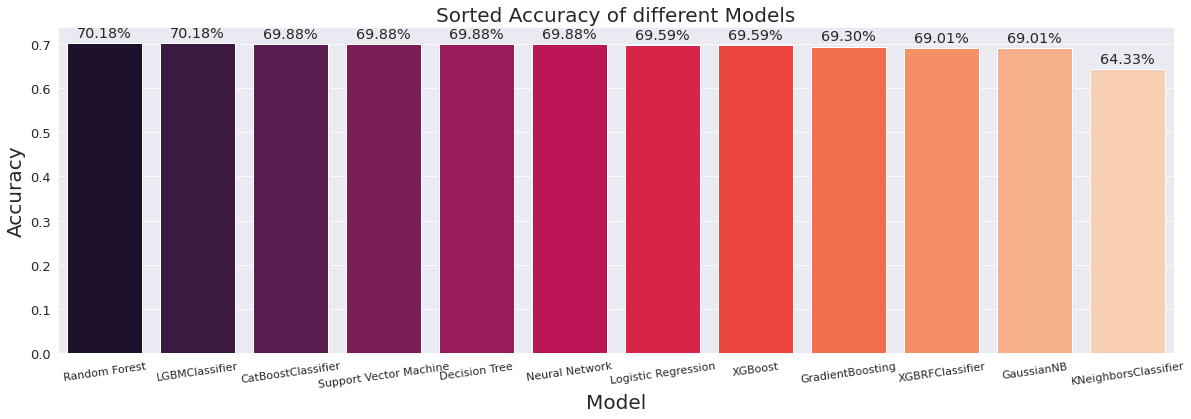

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

names = [
    "CatBoostClassifier",
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Neural Network",
    "Random Forest",
    "XGBoost",
    "LGBMClassifier",
    "XGBRFClassifier",
    "GradientBoosting",
    "GaussianNB",
    "KNeighborsClassifier"
]
models = [
    CatBoostClassifier(verbose= False),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    lightgbm.LGBMClassifier(max_depth=2, random_state=4),
    xgboost.XGBRFClassifier(max_depth=3, random_state=1),
    GradientBoostingClassifier(max_depth=2, random_state=1),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
]

accuracy=[]
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Sorted Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

 # Please let me know in the comments what improvements can be done 